In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

In [9]:
plt.rcParams['figure.dpi'] = 200

## Explore US Covid data from 2020-01 to date

In [20]:
# read US to-date Covid cases
us_daily = pd.read_csv('./data/us_daily.csv', index_col=0)
us_daily['deaths_total'] = us_daily['outcomes'].apply(lambda x: literal_eval(x)['death']['total']['value'])
us_daily['date'] = pd.to_datetime(us_daily['date'])

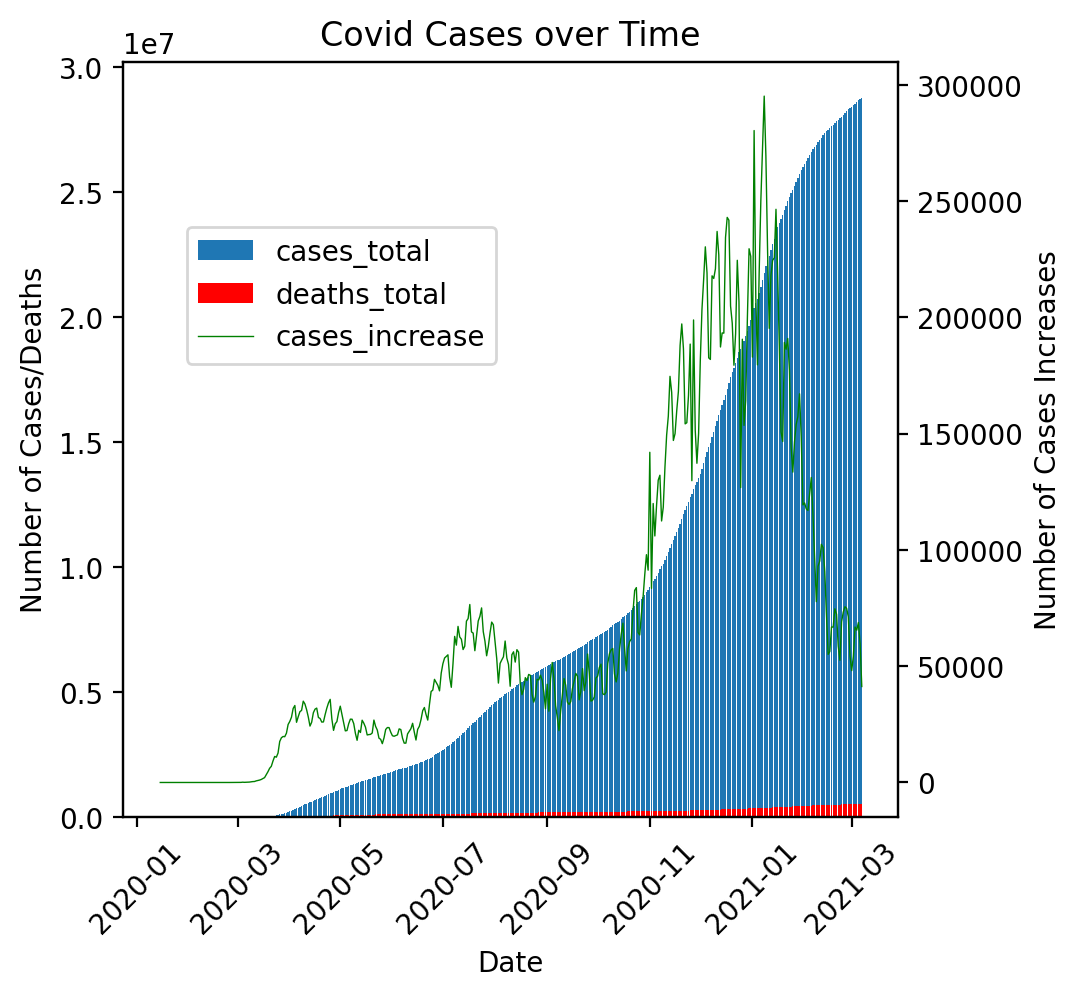

In [65]:
# plot US covid vs date
fig, ax1 = plt.subplots()

ax1.bar(us_daily['date'], us_daily['cases_total'], label='cases_total')
ax1.bar(us_daily['date'], us_daily['deaths_total'], label='deaths_total', color='red')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cases/Deaths')

ax2 = ax1.twinx()
ax2.plot(us_daily['date'], us_daily['cases_increase'], label='cases_increase', color='green', lw=0.5)
ax2.set_ylabel('Number of Cases Increases')

fig.legend(bbox_to_anchor=(0.5,0.8), bbox_transform=ax2.transAxes)
plt.title('Covid Cases over Time')
plt.savefig('us_daily.jpeg', bbox_inches='tight')

## Explore latest US Covid data by state

In [2]:
# read US Covid cases by states on March 10
us_0310 = pd.read_csv('./data/us_0310.csv', index_col=0)
states = pd.read_csv('./data/states.csv', index_col=0)

In [3]:
# filter out militaries, cruises, etc
us_0310 = us_0310[us_0310['USAState'].isin(states['name'])]

In [4]:
print('Top 5 states by TotalCases')
us_0310.sort_values(by='TotalCases', axis=0, ascending=False).head()

Top 5 states by TotalCases


,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,TotCasesPer1MPop,DeathsPer1MPop,TotalTests,TestsPer1MPop,Population,Projections
1,1.0,California,3608376,"+4,168",54621.0,+227,1891820.0,1661935.0,91323.0,1382.0,50139831.0,1268970.0,39512223.0,[projections]
2,2.0,Texas,2708716,"+5,119",45808.0,+168,2533691.0,129217.0,93417.0,1580.0,23772698.0,819865.0,28995881.0,[projections]
3,3.0,Florida,1952733,"+4,426",31926.0,+162,1223932.0,696875.0,90919.0,1486.0,22339182.0,1040109.0,21477737.0,[projections]
4,4.0,New York,1745965,"+7,153",48726.0,+83,839031.0,858208.0,89750.0,2505.0,40016070.0,2057005.0,19453561.0,[projections]
5,5.0,Illinois,1201027,"+1,510",23039.0,+19,1112007.0,65981.0,94779.0,1818.0,18733271.0,1478341.0,12671821.0,[projections]


In [5]:
print('Top 5 states by Total Cases per 1M Population')
us_0310.sort_values(by='TotCasesPer1MPop', axis=0, ascending=False).head()

Top 5 states by Total Cases per 1M Population


,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,TotCasesPer1MPop,DeathsPer1MPop,TotalTests,TestsPer1MPop,Population,Projections
43,43.0,North Dakota,100514,+95,1449.0,NaN,98489.0,576.0,131897.0,1901.0,406805.0,533821.0,762062.0,[projections]
41,41.0,South Dakota,113753,+157,1901.0,NaN,109755.0,2097.0,128584.0,2149.0,428873.0,484789.0,884659.0,[projections]
40,40.0,Rhode Island,129277,+296,2556.0,+7,7936.0,118785.0,122033.0,2413.0,3141318.0,2965295.0,1059361.0,[projections]
27,27.0,Utah,375669,+560,1990.0,+13,359997.0,13682.0,117178.0,621.0,3934278.0,1227177.0,3205958.0,[projections]
28,28.0,Iowa,367894,+629,5574.0,+15,321517.0,40803.0,116604.0,1767.0,4169851.0,1321635.0,3155070.0,[projections]


In [7]:
def plot_state_covid(state):
    '''
    Plot state covid data vs date
    '''
    state_abbr = states[states['name']==state]['state_code'].values[0]
    df = pd.read_csv(f'./data/states_{state_abbr.lower()}_daily_simple.csv', index_col=0)
    df['cases_increase'] = -df['cases_total'].diff()
    df['date'] = pd.to_datetime(df['date'])
    df['deaths_total'] = df['outcomes'].apply(lambda x: literal_eval(x)['death']['total'])
    
    fig, ax1 = plt.subplots()

    ax1.bar(df['date'], df['cases_total'], label='cases_total')
    ax1.bar(df['date'], df['deaths_total'], label='deaths_total', color='red')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Cases/Deaths')

    ax2 = ax1.twinx()
    ax2.plot(df['date'], df['cases_increase'], label='cases_increase', color='green', lw=0.5)
    ax2.set_ylabel('Number of Cases Increases')

    fig.legend(bbox_to_anchor=(0.5,0.8), bbox_transform=ax2.transAxes)
    plt.title(f'{state} Covid Cases over Time')
    plt.savefig(f'{state}_daily.jpeg', bbox_inches='tight')

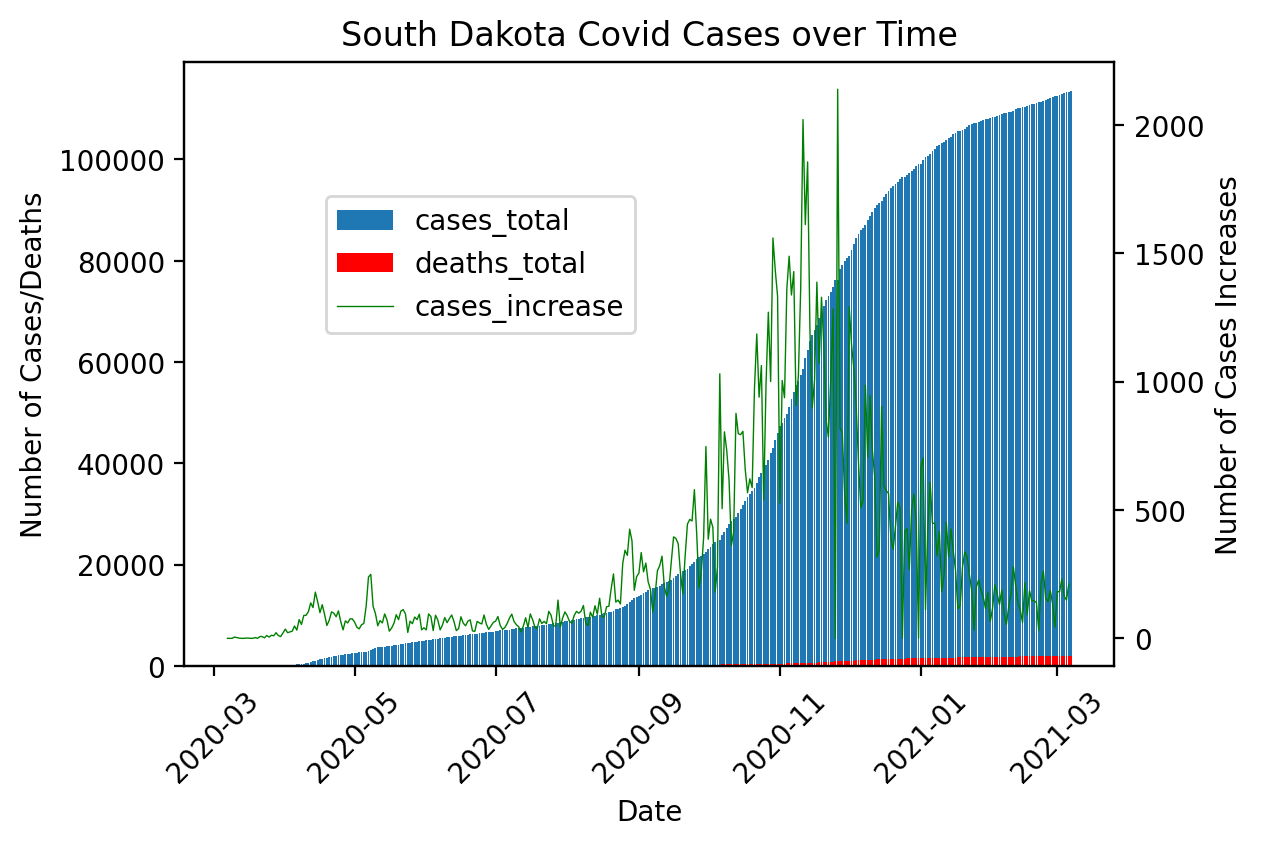

In [10]:
plot_state_covid('South Dakota')

'ND'

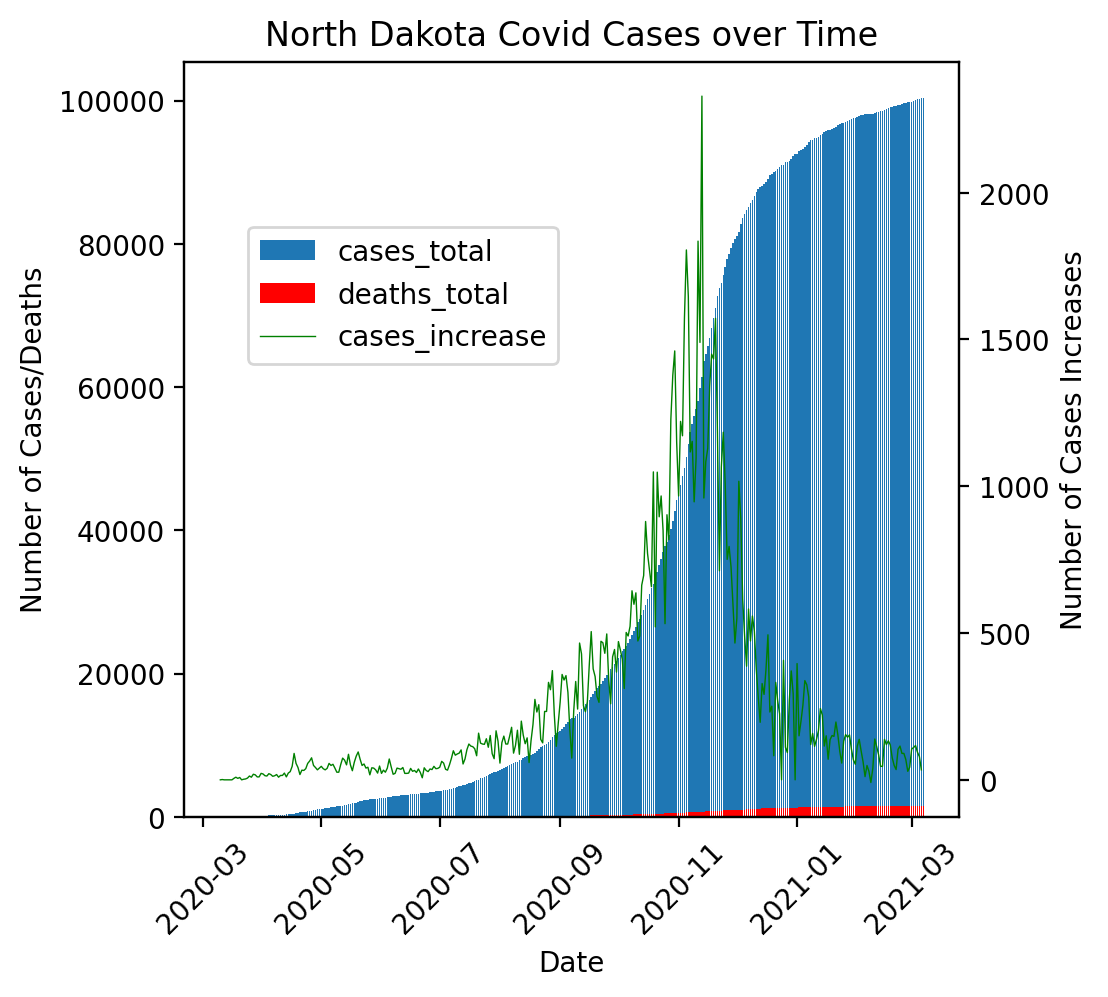

In [152]:
plot_state_covid('North Dakota')

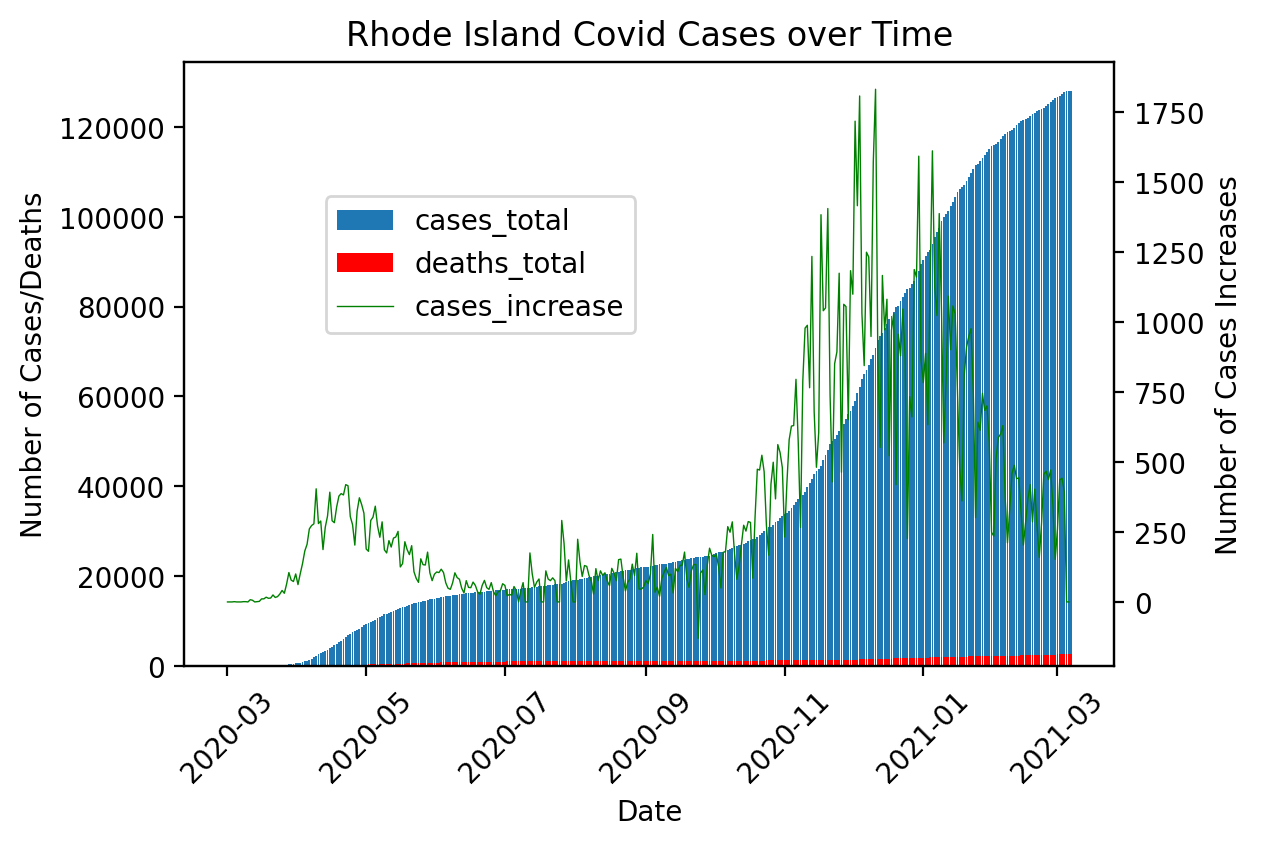

In [11]:
plot_state_covid('Rhode Island')

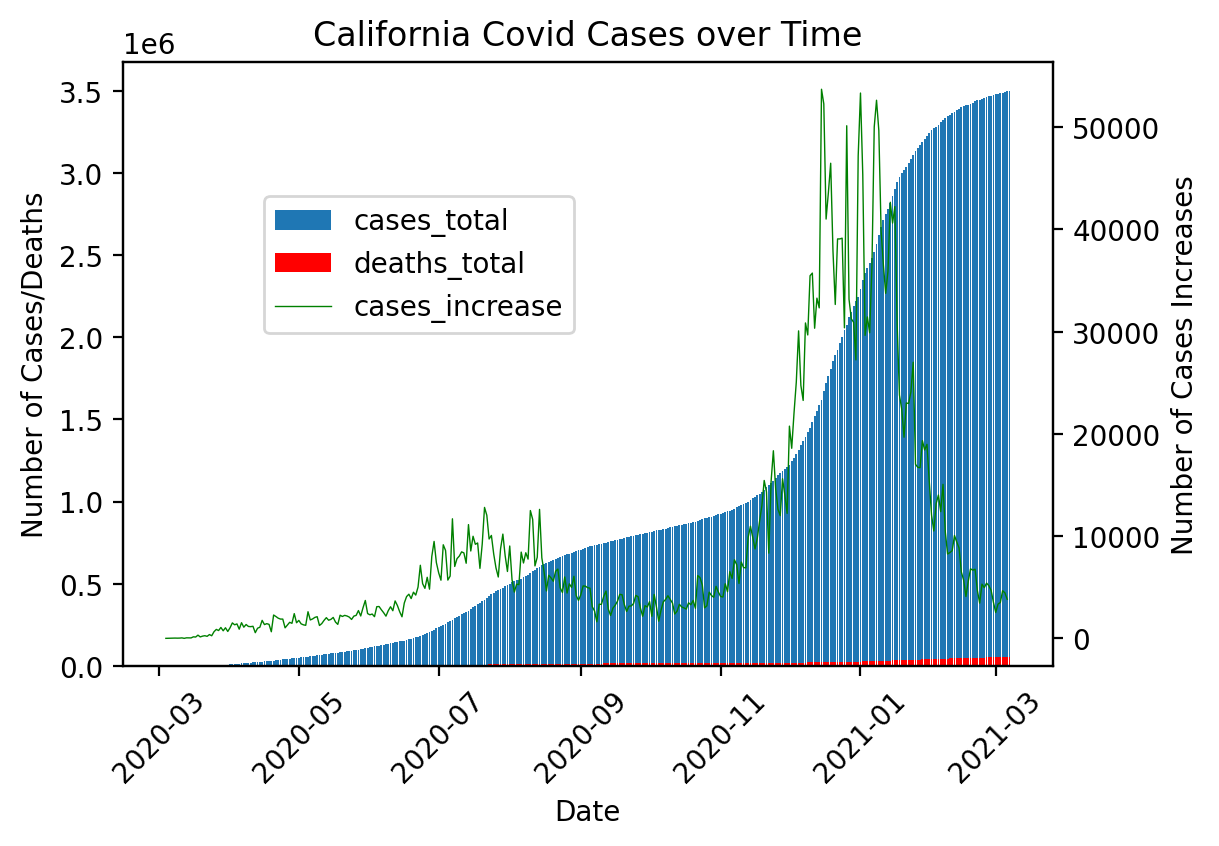

In [12]:
plot_state_covid('California')

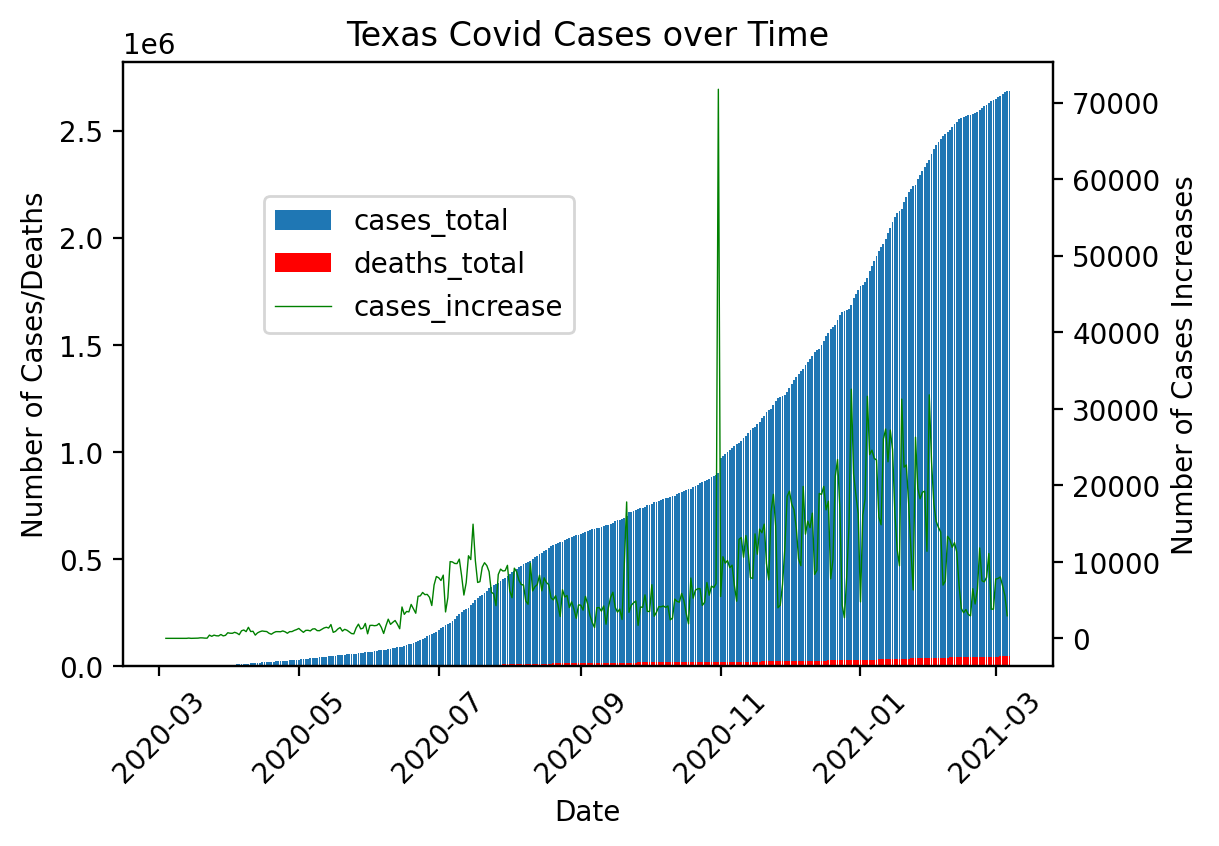

In [13]:
plot_state_covid('Texas')

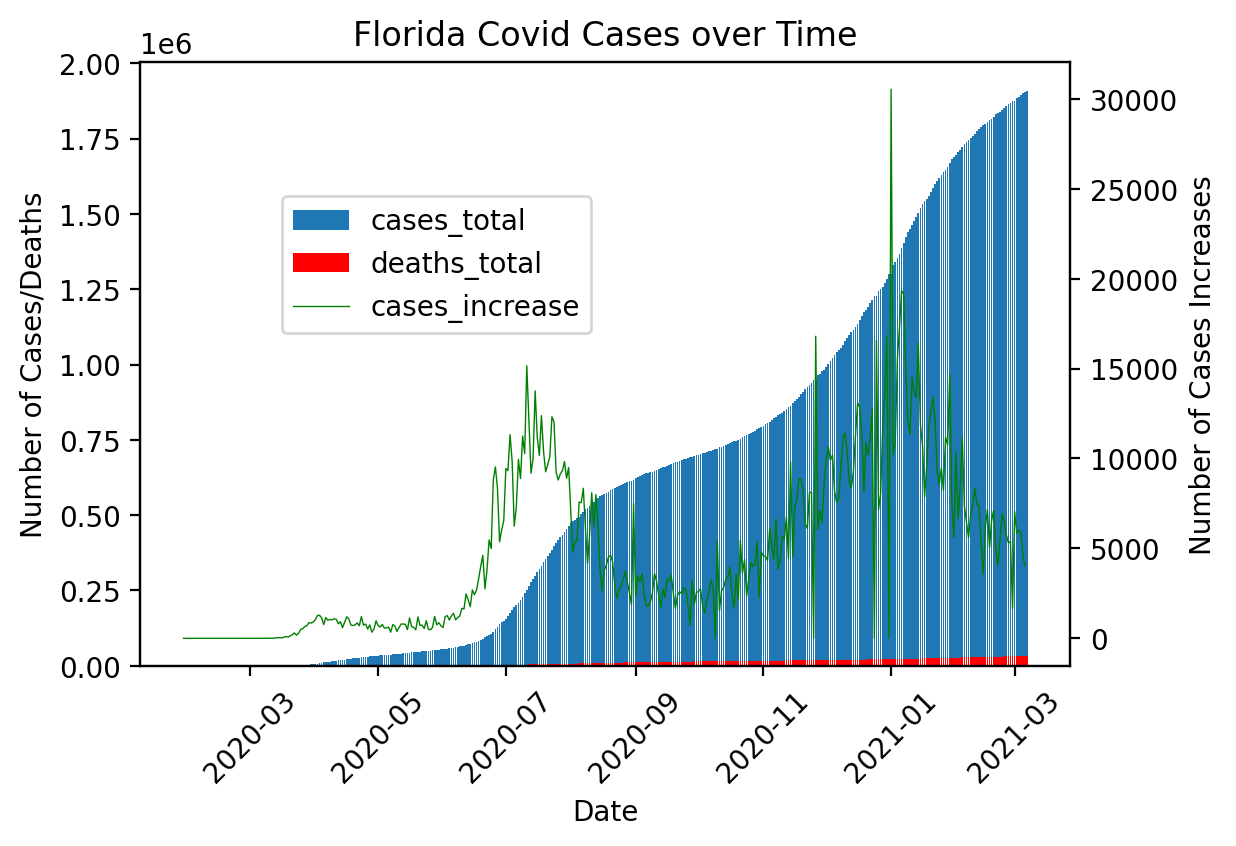

In [14]:
plot_state_covid('Florida')

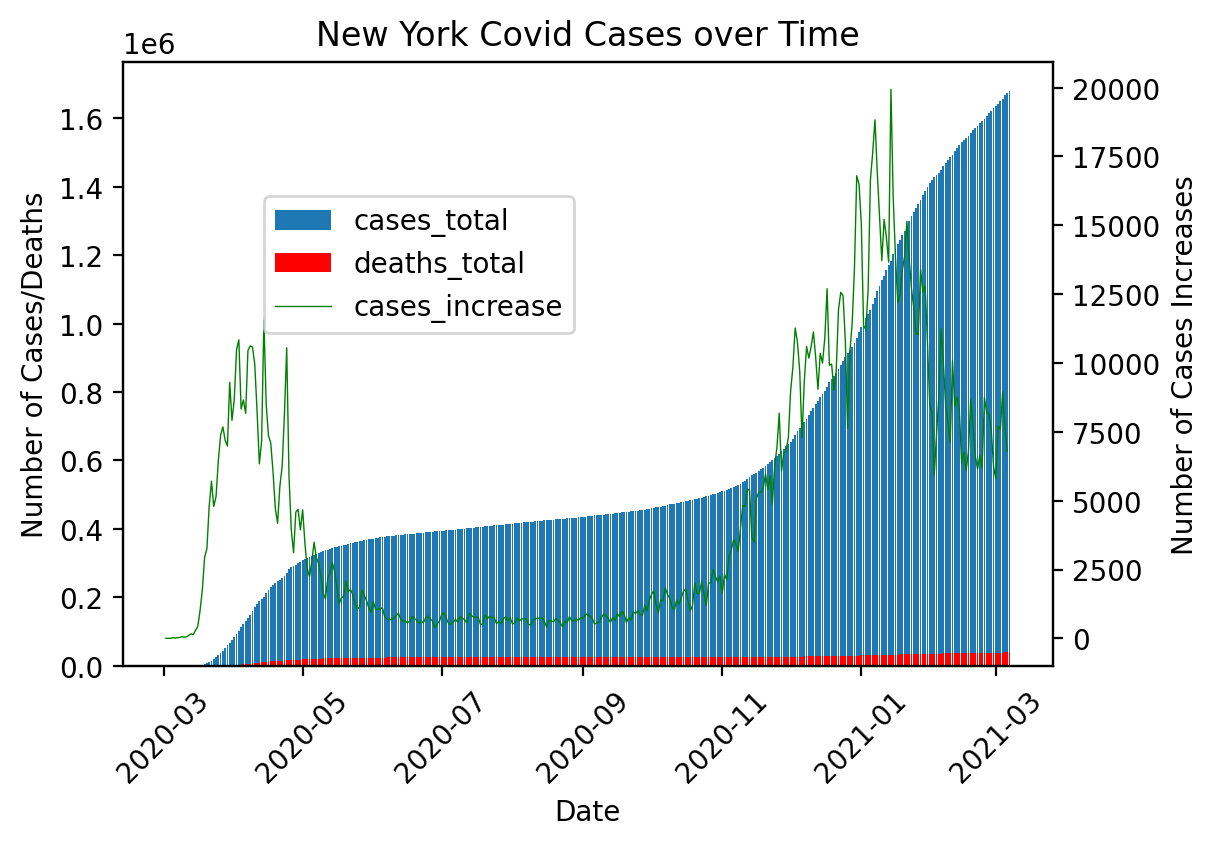

In [15]:
plot_state_covid('New York')

In [156]:
us_counties = pd.read_csv('./data/us-counties.csv')
us_counties['date'] = pd.to_datetime(us_counties['date'])

In [158]:
us_counties.shape

(1102192, 6)

In [176]:
us_counties[us_counties['fips']==53063]

,date,county,state,fips,cases,deaths
295,2020-02-24,Spokane,Washington,53063.0,4,0.0
312,2020-02-25,Spokane,Washington,53063.0,4,0.0
332,2020-02-26,Spokane,Washington,53063.0,4,0.0
352,2020-02-27,Spokane,Washington,53063.0,4,0.0
374,2020-02-28,Spokane,Washington,53063.0,4,0.0
...,...,...,...,...,...,...
1089048,2021-03-04,Spokane,Washington,53063.0,37575,586.0
1092294,2021-03-05,Spokane,Washington,53063.0,37579,587.0
1095540,2021-03-06,Spokane,Washington,53063.0,37613,590.0
1098788,2021-03-07,Spokane,Washington,53063.0,37688,591.0
